<h1 style="text-align: center;"> Weak Law of Large Numbers</h1>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<br>

### **1. Real Coin Toss Data**

In [2]:
df = pd.read_csv("coin_toss.csv")

In [37]:
df.shape

(400, 1)

In [ ]:
df.head()   # heads -> 1, tails -> 0

,Toss
0,0
1,0
2,1
3,1
4,0


In [78]:
sample_mean = []  # to store mean value after each toss sample

toss = df["Toss"].values  # Toss series array

for i in range(1,len(toss)+1):

    sample_mean.append( toss[:i].mean() )

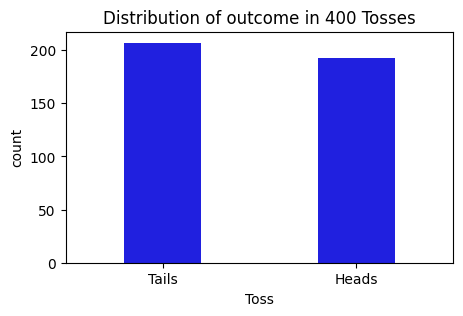

In [79]:
plt.figure(figsize=(5,3))
sns.countplot(x = df["Toss"].map({1:'Heads', 0:'Tails'}), stat='count', color='blue', width=0.4)

plt.title("Distribution of outcome in 400 Tosses")
plt.show()

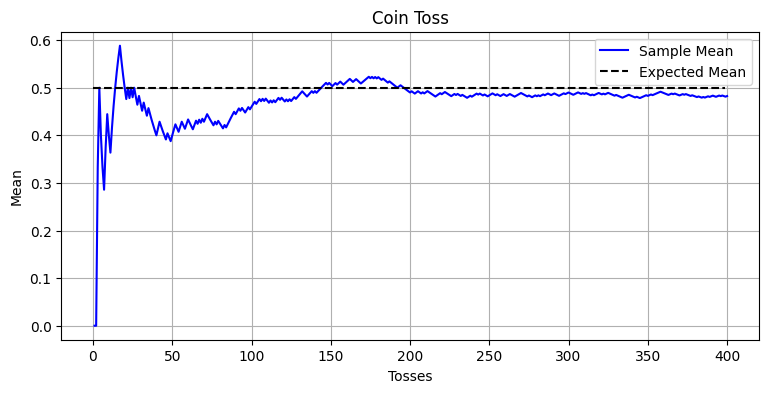

In [80]:
plt.figure(figsize=(9,4))

plt.plot(range(1,len(sample_mean) +1), sample_mean, 'b-', label = "Sample Mean")
plt.plot([0.5]*len(sample_mean), 'k--', label = "Expected Mean")

plt.title("Coin Toss")
plt.xlabel("Tosses")
plt.ylabel("Mean")
plt.grid(True)
plt.legend()
plt.show()

<h3>Notice that while the mean varies significantly at first, <br>but it gets stable and approaches 0.5 as the number of trials increases </h3>

<br>

### **2. Dice Data Generated from numpy simulation**

In [ ]:
sample_size = 1000
dice = np.random.randint(1,7, size = sample_size)   # Uniform distribution samples { 1, 2, 3, 4, 5, 6 } 

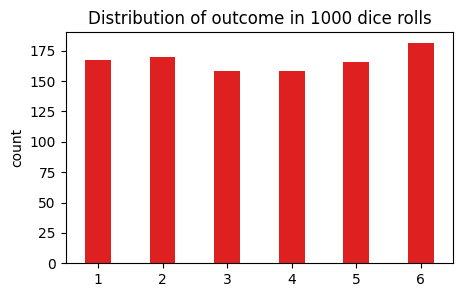

In [89]:
plt.figure(figsize=(5,3))
sns.countplot(x = dice, stat='count', color='red', width=0.4)

plt.title(f"Distribution of outcome in {sample_size} dice rolls")
plt.show()

In [82]:
sample_mean = []  # to store mean value after each dice roll sample

for i in range(1,len(dice)+1):

    sample_mean.append( dice[:i].mean() )

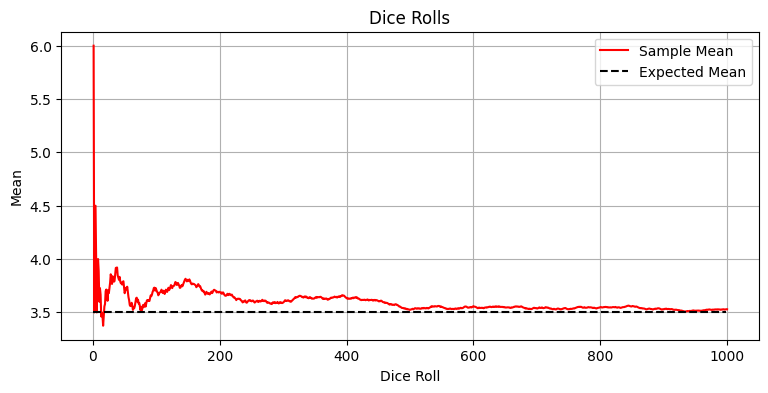

In [159]:
plt.figure(figsize=(9,4))

plt.plot(range(1,len(sample_mean) +1), sample_mean, 'r-', label = "Sample Mean")
plt.plot([21/6]*len(sample_mean), 'k--', label = "Expected Mean")

plt.title("Dice Rolls")
plt.xlabel("Dice Roll")
plt.ylabel("Mean")
plt.grid(True)
plt.legend()
plt.show()

<br>

#### Now, Individual dice outcome {1,2,3,4,5,6} should also tend to their *expected proportion*, <br> that is **1/6 = 0.167**. <br>As this is a *uniform distribution*, each outcome is equally likely

In [ ]:
outcome_count = {}  # to store count of each outcome {1,2,3,4,5,6} after each dice roll sample
mean_dict = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}   # to store mean of each outcome {1,2,3,4,5,6} after each dice roll sample

for i in range(0,len(dice)):
    outcome = dice[i]
    outcome_count[outcome] = outcome_count.get(outcome, 0) + 1  # increament the counter for that outcome

    for k in outcome_count:
        mean_dict[k].append(outcome_count[k] / (i+1))  # calculate the proportion of that outcome till i+1 th toss

In [115]:
len(mean_dict[1])

999

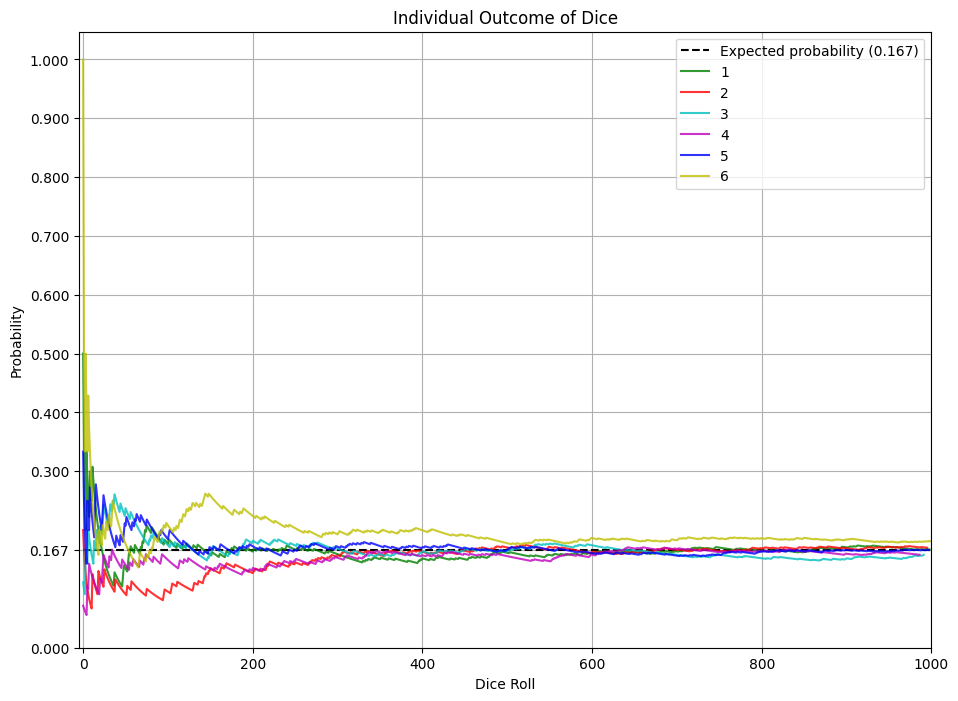

In [158]:
plt.figure(figsize=(11,8))
plt.plot([1/6]*len(dice), 'k--', label = "Expected probability (0.167)")


plt.plot(mean_dict[1], 'g-', label = '1', alpha=0.8)
plt.plot(mean_dict[2], 'r-', label = '2', alpha=0.8)
plt.plot(mean_dict[3], 'c-', label = '3', alpha=0.8)
plt.plot(mean_dict[4], 'm-', label = '4', alpha=0.8)
plt.plot(mean_dict[5], 'b-', label = '5', alpha=0.8)
plt.plot(mean_dict[6], 'y-', label = '6', alpha=0.8)

plt.title("Individual Outcome of Dice")
plt.xlabel("Dice Roll")
plt.ylabel("Probability")
plt.xlim([-5,1000])
plt.yticks([0, 1/6, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid(True)
plt.legend()
plt.show()

<br>

#### **law of Large Numbers** states that - *" given a sample of independent and identically distributed values, the average converges to the expected value*<br><br> The law of large numbers is important because it guarantees stable long-term results for the averages of some random events. The law applies only when a large number of observations are considered.Throughout its history, many mathematicians have refined this law. Today, the law of large numbers is used in many fields including statistics, probability theory, economics, and insurance* <br><br> More on LLN on wikipedia -> https://en.wikipedia.org/wiki/Law_of_large_numbers

<br>